## Export wood pellets to EU

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wood_pellets_to_eu = pd.read_csv('data/wood_pellets_2010_2017_eu28.csv')

In [3]:
wood_pellets_to_eu = wood_pellets_to_eu.drop(columns=['table_name','units'])
wood_pellets_to_eu.head()

,country,district,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
0,Austria,"Columbia-Snake, OR",0,0,0,0,127500,0,0,0
1,Austria,"New York, NY",0,0,8165,0,0,0,0,0
2,Austria,"Norfolk, VA",0,0,0,1134036,0,0,0,0
3,Belgium,"Charleston, SC",0,0,0,0,1369633,0,7882,0
4,Belgium,"Charlotte, NC",0,0,0,25583,0,0,0,211465010


In [4]:
wood_pellets_to_eu_tidy = pd.wide_to_long(wood_pellets_to_eu, stubnames='year_',i = ['country', 'district'], j = 'year')

In [5]:
wood_pellets_to_eu_tidy = wood_pellets_to_eu_tidy.stack().reset_index()
wood_pellets_to_eu_tidy = wood_pellets_to_eu_tidy.drop(columns=['level_3'])
wood_pellets_to_eu_tidy.columns = ['country', 'district', 'year', 'pellets_exported_kg']

In [6]:
wood_pellets_to_eu_tidy.head()

,country,district,year,pellets_exported_kg
0,Austria,"Columbia-Snake, OR",2010,0
1,Austria,"Columbia-Snake, OR",2011,0
2,Austria,"Columbia-Snake, OR",2012,0
3,Austria,"Columbia-Snake, OR",2013,0
4,Austria,"Columbia-Snake, OR",2014,127500


In [7]:
wood_pellets_to_eu_tidy['Port'], wood_pellets_to_eu_tidy['State'] = wood_pellets_to_eu_tidy['district'].str.split(', ', 1).str
wood_pellets_to_eu_tidy = wood_pellets_to_eu_tidy.drop(columns=['district'])

In [8]:
wood_pellets_to_eu_tidy.State.unique()

array(['OR', 'NY', 'VA', 'SC', 'NC', 'OH', 'TX', 'AL', 'LA', 'CA', 'GA',
       'FL', 'PA', 'MI', 'WA', 'MD'], dtype=object)

In [9]:
wood_pellets_to_eu_from_se = wood_pellets_to_eu_tidy.query('State == ["GA","SC","NC","AL","LA","VA","FL"]')

In [10]:
wood_pellets_to_eu_from_se_2017 = wood_pellets_to_eu_from_se.query('year == 2017 and pellets_exported_kg != 0')

In [11]:
wood_pellets_to_eu_from_se_2017

,country,year,pellets_exported_kg,Port,State
39,Belgium,2017,211465010,Charlotte,NC
63,Belgium,2017,26692901,Mobile,AL
87,Belgium,2017,121672110,Norfolk,VA
111,Belgium,2017,161095654,Savannah,GA
119,Belgium,2017,15957338,Tampa,FL
151,Denmark,2017,11165535,Charlotte,NC
167,Denmark,2017,42073558,Mobile,AL
183,Denmark,2017,857933,Norfolk,VA
207,Denmark,2017,27050185,Savannah,GA
215,Denmark,2017,279531509,Tampa,FL


In [13]:
wood_pellets_to_eu_from_se_2017.agg({'pellets_exported_kg': 'sum'})/1e6

pellets_exported_kg    4924.02513
dtype: float64

In [12]:
wood_pellets_to_eu_from_se_2017_sum_eu = wood_pellets_to_eu_from_se_2017.groupby(['country']).agg({'pellets_exported_kg':'sum', 'year':'first'})

In [76]:
wood_pellets_to_eu_from_se_2017_sum_port = wood_pellets_to_eu_from_se_2017.groupby(['Port']).agg({'pellets_exported_kg':'sum', 'year':'first'})

In [13]:
wood_pellets_to_eu_from_se_2017_sum_eu = wood_pellets_to_eu_from_se_2017_sum_eu.drop(columns='year')
wood_pellets_to_eu_from_se_2017_sum_eu = wood_pellets_to_eu_from_se_2017_sum_eu.stack().reset_index()
wood_pellets_to_eu_from_se_2017_sum_eu = wood_pellets_to_eu_from_se_2017_sum_eu.drop(columns='level_1')
wood_pellets_to_eu_from_se_2017_sum_eu.columns=['Country','pellets_exported_kg']
wood_pellets_to_eu_from_se_2017_sum_eu

,Country,pellets_exported_kg
0,Belgium,536883013
1,Denmark,360678720
2,Estonia,1000
3,France,7439
4,Germany,724982
5,Greece,462342
6,Italy,48714633
7,Netherlands,887799
8,Sweden,18815
9,United Kingdom,3975646387


In [77]:
wood_pellets_to_eu_from_se_2017_sum_port = wood_pellets_to_eu_from_se_2017_sum_port.drop(columns='year')
wood_pellets_to_eu_from_se_2017_sum_port = wood_pellets_to_eu_from_se_2017_sum_port.stack().reset_index()
wood_pellets_to_eu_from_se_2017_sum_port = wood_pellets_to_eu_from_se_2017_sum_port.drop(columns='level_1')
wood_pellets_to_eu_from_se_2017_sum_port.columns=['Port','pellets_exported_kg']
wood_pellets_to_eu_from_se_2017_sum_port

,Port,pellets_exported_kg
0,Charleston,18815
1,Charlotte,551364329
2,Mobile,149074828
3,New Orleans,772128404
4,Norfolk,1428697808
5,Savannah,1327253304
6,Tampa,695487642


In [15]:
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [20]:
wood_pellets_to_eu_from_se_2017_sum_eu['text'] = wood_pellets_to_eu_from_se_2017_sum_eu['Country'] + ' ' + \
                                                    str(wood_pellets_to_eu_from_se_2017_sum_eu['pellets_exported_kg'] / 1e6) + ' mt in 2017'

In [192]:
wood_pellets_to_eu_from_se_2017_sum_eu = wood_pellets_to_eu_from_se_2017_sum_eu.groupby(['Country']).agg({'pellets_exported_kg':'first', 'Code':'last', 'text':'first'})

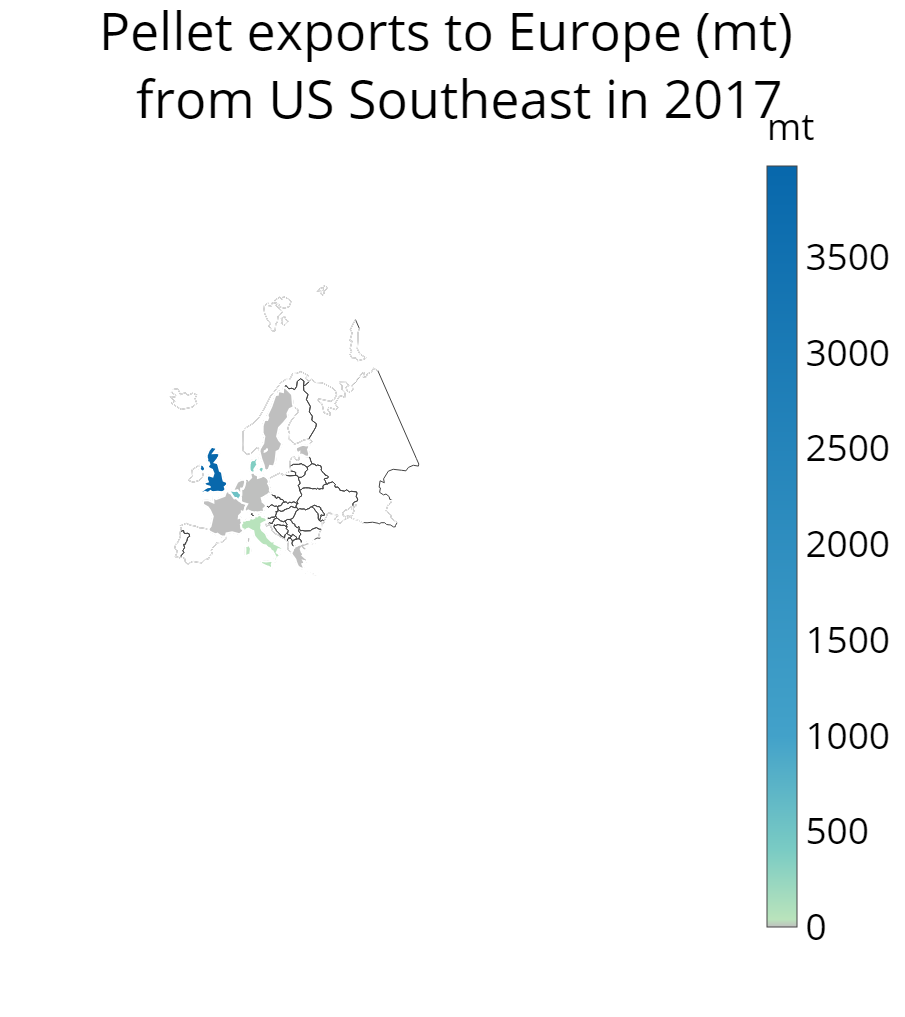

In [43]:
scl = [[0.0, '#BFBFBF'],[0.01, '#bae4bc'],\
            [0.1, '#7bccc4'],[0.25, '#43a2ca'],[1.0, '#0868ac']]

data = [ dict(
        type='choropleth',
        colorscale =scl,
        autocolorscale = False,
        locations = wood_pellets_to_eu_from_se_2017_sum_eu['Country'],
        z = wood_pellets_to_eu_from_se_2017_sum_eu['pellets_exported_kg'].astype(float)/1e6,
        locationmode = 'country names',
        text = wood_pellets_to_eu_from_se_2017_sum_eu['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "mt")
        ) ]

layout = dict(
        title = 'Pellet exports to Europe (mt) <br> from US Southeast in 2017',
        height=1000,
        width=1000,
        showlegend = True,
        legend = dict(orientation='h'),
        font = dict(family = 'Open Sans', size=37, color='black'),
        geo = dict(
            scope='europe',
            projection=dict( type='conic conformal' ),
            showlakes = True,
            showcoastlines = True,
            coastlinecolor = 'rgb(255, 255, 255)',
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot(fig)

In [44]:
pio.write_image(fig, 'export_to_eu_2017.svg', width = 1000, height = 1000, scale = 0.36)

ValueError: 
For some reason plotly.py was unable to communicate with the
local orca server process, even though the server process seems to be running.

Please review the process and connection information below:

orca status
-----------
    state: running
    executable: C:\Users\email\Miniconda3\envs\mapenv\orca.CMD
    version: 1.1.1
    port: 60905
    pid: 6620
    command: ['C:\\Users\\email\\Miniconda3\\envs\\mapenv\\orca.CMD', 'serve', '-p', '60905', '--plotly', 'C:\\Users\\email\\Miniconda3\\envs\\mapenv\\lib\\site-packages\\plotly\\package_data\\plotly.min.js', '--graph-only', '--mathjax', 'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js']
    

